Plan:
- Dealing with NaN values
- Data visualization and exploration(means, medians etc.) + analyse result value distribution
- Outlier detection and handling
- Feature Engineering (Feature selection):
    - Visualize correlation matrix in order to find least useful features that do not corelate with the output
    - Use other feature selection techniques
- Perform a dimesion reduction:
    - Make a PCA plot
    - Try Heatmap, t-SNE plot, Multi-Dimensional Scaling(MDS)
- Label encoding for categorical variables
- Data normalization
- Data regularization
- Data splitting
- Selecting ML algorithm
- Hyperparameter tuning and use of cross-validation
- Testing

After looking at the data I have come to conclusion that the amount of features is big, so I decided to perform feature selection at first and then do some Feature engineering. Also the categorical variables seems not encoded and there are way too many categories in some features. There are also a lot of NaN values and I need to pick one of the methods to replace them.

In [60]:
import pandas as pd
import csv
import matplotlib.pyplot as plt 


In [61]:
df = pd.read_csv("./train_df.csv", sep='\t')
print(df.head())

   Unnamed: 0   num_1   num_2  num_3   num_4   num_5   num_6  num_7  cat_1  \
0           0  1377.3  3712.9    NaN  1303.0  2409.0  1281.7   43.0      1   
1           1    20.0    13.4    NaN   565.0     NaN   357.2   19.0      1   
2           4   150.6     1.8    NaN  2294.0    15.0   107.6   76.0      1   
3           5    11.4   178.0    NaN  1236.0     NaN   350.6   41.0      1   
4           6  5372.0  3386.0    NaN  1340.0     NaN    14.0   45.0      1   

   num_8  ...  num_413  cat_132  cat_133      num_414  num_415  num_416  \
0  195.0  ...  11327.5        1        1  28162496.65      0.0     0.07   
1  170.0  ...    168.6        1        1    989383.82      0.0     0.56   
2  196.0  ...    209.1        1        1     87444.51      0.0     0.01   
3  117.0  ...     56.9        1        1    297608.00      0.0     0.08   
4    9.0  ...     31.0        1        1   6614247.89      0.0     0.20   

   cat_134  cat_135  id  gb  
0        1        1   1   0  
1        2        1 

In [62]:
categorical = []
for column in df.columns:
    if column.find("cat")!=-1:
        categorical.append(column)
    df_categorical = df[categorical]
print(df_categorical.head())
        

In [ ]:
print("MAX VALUES")
print(df_categorical.max())
print("\nMIN VALUES")
print(df_categorical.min())
print("\nMEAN VALUES")
print(df_categorical.mean())
print("\nMEDIAN VALUES")
print(df_categorical.median())
print("\nVARIANCE VALUES")
print(df_categorical.var())

print(df_categorical["cat_1"])

MAX VALUES
cat_1      5
cat_2      3
cat_3      3
cat_4      3
cat_5      6
          ..
cat_131    4
cat_132    3
cat_133    2
cat_134    8
cat_135    4
Length: 135, dtype: int64

MIN VALUES
cat_1      1
cat_2      1
cat_3      1
cat_4      1
cat_5      1
          ..
cat_131    1
cat_132    1
cat_133    1
cat_134    1
cat_135    1
Length: 135, dtype: int64

MEAN VALUES
cat_1      1.001789
cat_2      1.141403
cat_3      1.362996
cat_4      1.002386
cat_5      1.127200
             ...   
cat_131    1.055174
cat_132    1.011109
cat_133    1.164480
cat_134    3.155942
cat_135    1.011967
Length: 135, dtype: float64

MEDIAN VALUES
cat_1      1.0
cat_2      1.0
cat_3      1.0
cat_4      1.0
cat_5      1.0
          ... 
cat_131    1.0
cat_132    1.0
cat_133    1.0
cat_134    3.0
cat_135    1.0
Length: 135, dtype: float64

VARIANCE VALUES
cat_1      0.005514
cat_2      0.122009
cat_3      0.231835
cat_4      0.004468
cat_5      0.139880
             ...   
cat_131    0.063913
cat_132    0.

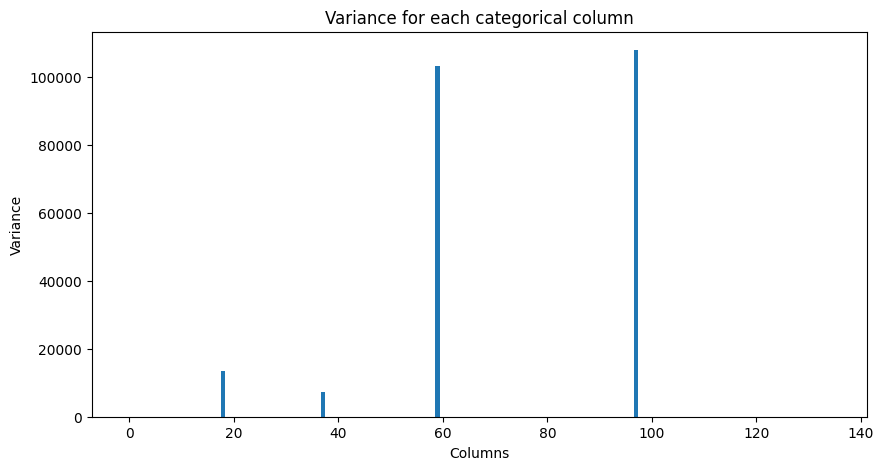

108034.93383735517


In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar([i for i in range(0,len(df_categorical.columns))], df_categorical.var())
 
plt.xlabel("Columns")
plt.ylabel("Variance")
plt.title("Variance for each categorical column")
plt.show()

print(max(df_categorical.var()))

In [ ]:
print(df_categorical.median().median())

1.0


As we can see, the median of all medians is 1. This means that most of the categorical values equal to 1, avarage, median is near 1 and variance is around 0. This means that most 